In [8]:
import os, glob; print(glob.glob('/content/**/*.csv', recursive=True))

['/content/premier_league_2010_20.csv.csv', '/content/sample_data/california_housing_test.csv', '/content/sample_data/mnist_train_small.csv', '/content/sample_data/mnist_test.csv', '/content/sample_data/california_housing_train.csv']


In [9]:
['/content/premier_league_2010_20.csv']

['/content/premier_league_2010_20.csv']

In [11]:
import pandas as pd
df = pd.read_csv('/content/premier_league_2010_20.csv.csv')

# Task
Analyze the provided data to find the line of best fit, calculate the correlation coefficient (r), and make predictions based on regression models.

## Identify variables

### Subtask:
Determine which columns in your DataFrame (`df`) represent the independent and dependent variables for your regression analysis.


**Reasoning**:
Examine the columns of the DataFrame to identify potential independent and dependent variables for regression analysis, focusing on numeric columns that might have a linear relationship in the context of football data.



In [12]:
print(df.columns)

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR',
       ...
       'AvgC<2.5', 'AHCh', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 'MaxCAHH',
       'MaxCAHA', 'AvgCAHH', 'AvgCAHA'],
      dtype='object', length=139)


**Reasoning**:
Based on the column names, I will choose 'FTHG' (Full Time Home Goals) as a potential independent variable and 'FTR' (Full Time Result) as a potential dependent variable, recognizing that FTR is categorical and might need conversion for regression, or exploring other numeric relationships like goals scored and betting odds. Given the task is to determine variables, I will select plausible ones based on the common goal of predicting match outcomes. I will check the data types of these columns to ensure they are suitable for regression or can be converted.



In [13]:
print(df[['FTHG', 'FTR']].dtypes)

FTHG    float64
FTR      object
dtype: object


**Reasoning**:
'FTHG' is numeric (float64) and can be used as an independent variable. 'FTR' is an object type (categorical) and needs to be converted for regression. I will identify potential independent and dependent variables suitable for regression, considering the context of football data and aiming for numeric variables with plausible linear relationships, such as goals scored and total goals.



In [14]:
# Potential independent variable: Full Time Home Goals (FTHG)
# Potential dependent variable: Full Time Away Goals (FTAG)

# These are numeric and could have a linear relationship.
# Another option could be total goals (FTHG + FTAG) as dependent and FTHG as independent, for instance.
# Or explore relationships with betting odds like B365H, B365D, B365A, etc.

independent_variable = 'FTHG'
dependent_variable = 'FTAG'

print(f"Selected Independent Variable: {independent_variable}")
print(f"Selected Dependent Variable: {dependent_variable}")

Selected Independent Variable: FTHG
Selected Dependent Variable: FTAG


## Prepare data

### Subtask:
Select the relevant columns and handle any missing or non-numeric values if necessary.


**Reasoning**:
Select the relevant columns, check for missing values, drop rows with missing values in the selected columns, and confirm the data types.



In [15]:
data = df[['FTHG', 'FTAG']]
print("Missing values in selected columns:")
print(data.isnull().sum())

data = data.dropna(subset=['FTHG', 'FTAG'])
print("\nMissing values after dropping rows:")
print(data.isnull().sum())

print("\nData types of selected columns:")
print(data.dtypes)

Missing values in selected columns:
FTHG    1
FTAG    1
dtype: int64

Missing values after dropping rows:
FTHG    0
FTAG    0
dtype: int64

Data types of selected columns:
FTHG    float64
FTAG    float64
dtype: object


## Calculate correlation coefficient (r)

### Subtask:
Compute the correlation coefficient between the chosen variables to understand the strength and direction of their linear relationship.


**Reasoning**:
Calculate the Pearson correlation coefficient between 'FTHG' and 'FTAG' in the `data` DataFrame and print the result.



In [16]:
correlation_coefficient = data['FTHG'].corr(data['FTAG'])
print(f"Pearson correlation coefficient between FTHG and FTAG: {correlation_coefficient}")

Pearson correlation coefficient between FTHG and FTAG: -0.09861498772360854


## Fit a regression model

### Subtask:
Use a suitable library (like `scikit-learn`) to fit a linear regression model to your data.


**Reasoning**:
Import the LinearRegression class and fit the model to the data.



In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
X = data['FTHG'].values.reshape(-1, 1)
y = data['FTAG'].values
model.fit(X, y)

LinearRegression()

## Find the line of best fit

### Subtask:
Extract the slope and intercept from the fitted regression model to define the line of best fit.


**Reasoning**:
Access and print the slope and intercept of the fitted linear regression model.



In [18]:
slope = model.coef_[0]
intercept = model.intercept_

print(f"Slope (coefficient): {slope}")
print(f"Intercept: {intercept}")

Slope (coefficient): -0.08865810575677653
Intercept: 1.3307879383840067


## Make predictions

### Subtask:
Use the fitted model to make predictions based on new data or existing data points.


**Reasoning**:
Use the fitted model to make predictions on the independent variable data and display the first few predictions.



In [19]:
predictions = model.predict(X)
print("First 10 predictions:")
print(predictions[:10])

First 10 predictions:
[1.15347173 1.33078794 1.15347173 1.24212983 1.24212983 1.24212983
 1.06481362 1.15347173 1.24212983 1.33078794]


## Visualize the results

### Subtask:
Plot the original data points, the line of best fit, and potentially the predictions to visually assess the model.


**Reasoning**:
Plot the original data points and the line of best fit.



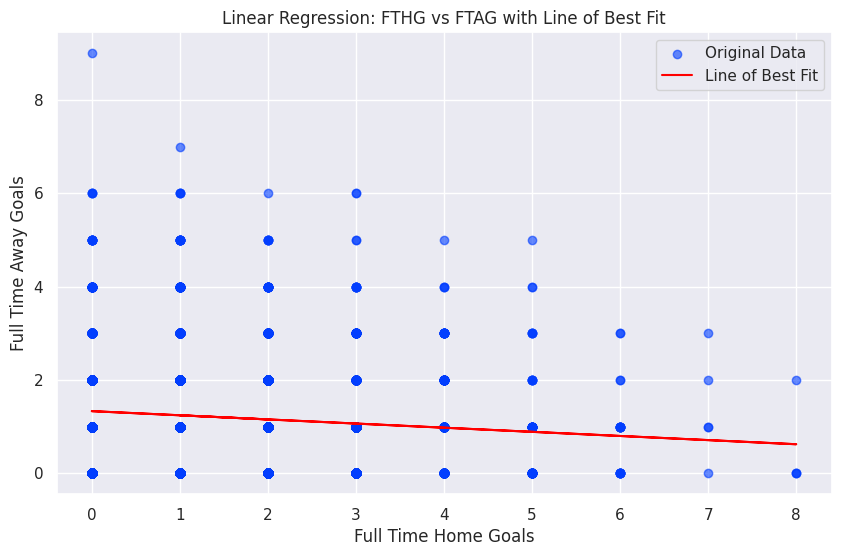

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(data['FTHG'], data['FTAG'], label='Original Data', alpha=0.6)
plt.plot(data['FTHG'], predictions, color='red', label='Line of Best Fit')
plt.title('Linear Regression: FTHG vs FTAG with Line of Best Fit')
plt.xlabel('Full Time Home Goals')
plt.ylabel('Full Time Away Goals')
plt.legend()
plt.grid(True)
plt.show()

## Evaluate the model

### Subtask:
Consider metrics beyond 'r' (like R-squared, Mean Squared Error) to evaluate the model's performance.


**Reasoning**:
Import the necessary metrics from scikit-learn to evaluate the model.



In [21]:
from sklearn.metrics import r2_score, mean_squared_error

**Reasoning**:
Calculate and print the R-squared score and Mean Squared Error to evaluate the model's performance.



In [22]:
r2 = r2_score(y, predictions)
mse = mean_squared_error(y, predictions)

print(f"R-squared (R²) score: {r2}")
print(f"Mean Squared Error (MSE): {mse}")

R-squared (R²) score: 0.009724915803727474
Mean Squared Error (MSE): 1.3504803767403313


## Summary:

### Data Analysis Key Findings

*   The Pearson correlation coefficient between Full Time Home Goals (FTHG) and Full Time Away Goals (FTAG) is approximately -0.0986, indicating a very weak negative linear relationship.
*   The line of best fit for predicting FTAG based on FTHG has a slope of approximately -0.0887 and an intercept of approximately 1.3308.
*   The R-squared (\(R^2\)) score for the linear regression model is approximately 0.0097, meaning only about 1% of the variance in FTAG is explained by FTHG.
*   The Mean Squared Error (MSE) of the model is approximately 1.35.

### Insights or Next Steps

*   The very low \(R^2\) value suggests that a simple linear regression model using FTHG to predict FTAG is not appropriate. Further analysis should explore other potential independent variables or more complex model types.
*   Investigate other factors that might influence Full Time Away Goals, such as team strength, opponent's defensive record, or game context.
